In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn_sfa_master.sksfa import HSFA
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.load('data/data_squareRoom.npy')
crop_h = 20
crop_w = 10
dim_step= 2
data = data[:, crop_h:-crop_h, crop_w:-crop_w][:, ::dim_step][:, :, ::dim_step]
gc.collect()
print(data.shape)

(22000, 15, 95, 3)


In [3]:
# images = [x.flatten() for x in data[:1000]]
scaler = StandardScaler()
images = data

n_samples = 1000
image_width, image_height = 190, 30
dimension = image_width * image_height

layer_configurations = [(5, 5, 5, 5, 4, 1)]
hsfa = HSFA(3, images.shape[1:], layer_configurations, noise_std=0.1)
hsfa = hsfa.fit(images)
slow_features = hsfa.transform(images)

<IPython.core.display.Javascript object>


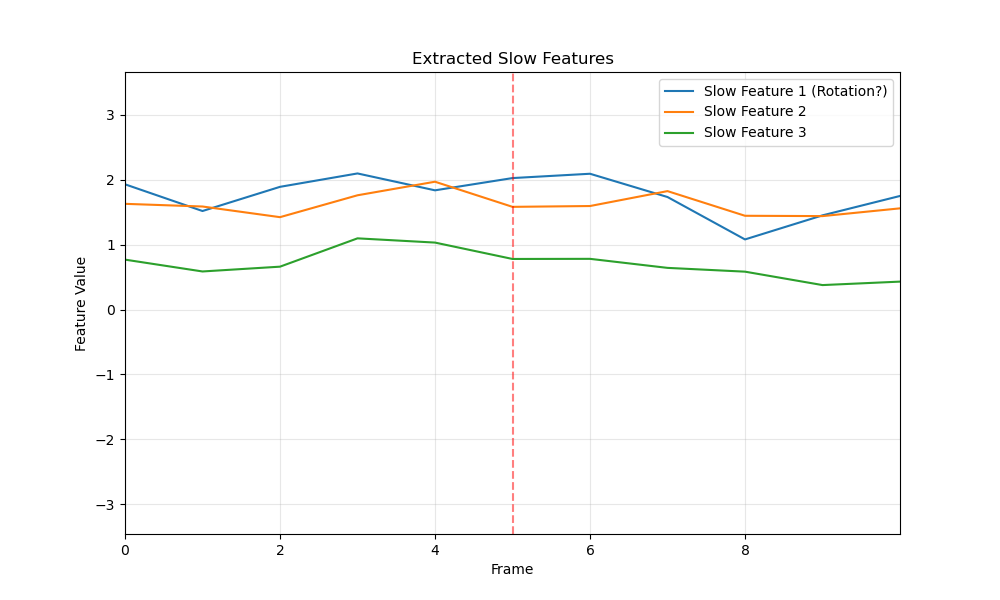

<IPython.core.display.Javascript object>


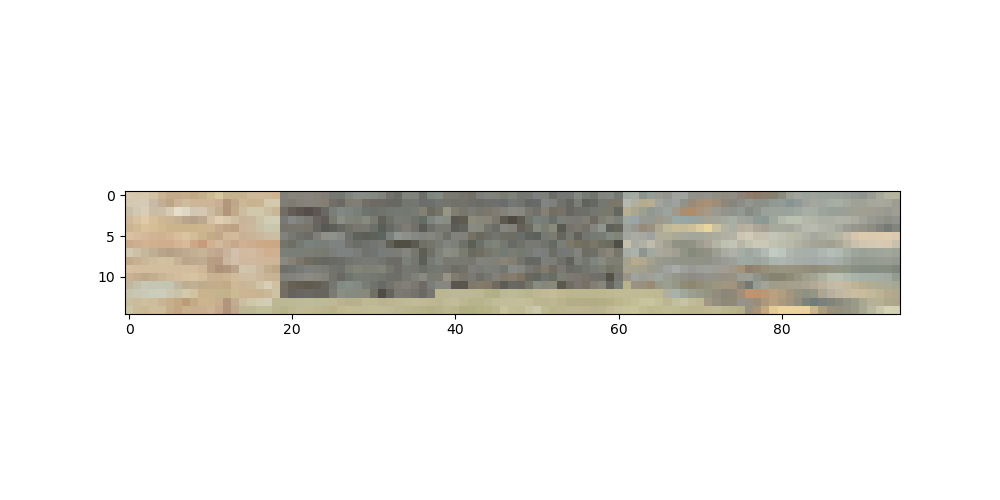

C:\Users\pwieg\AppData\Local\Temp\ipykernel_15652\3365195842.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  hline.set_xdata(startIndex + i)


KeyboardInterrupt: 

In [27]:
startIndex = 0
length = 10

plt.ion()
%matplotlib notebook

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot(slow_features[:, 0], label="Slow Feature 1 (Rotation?)")
ax.plot(slow_features[:, 1], label="Slow Feature 2")
ax.plot(slow_features[:, 2], label="Slow Feature 3")
ax.legend()
ax.grid(alpha=.3)
hline = ax.axvline(startIndex, c='r', alpha=.5, linestyle='--')
plt.title("Extracted Slow Features")
plt.xlabel("Frame")
plt.ylabel("Feature Value")
plt.xlim(startIndex,startIndex + length)
plt.xticks(np.arange(startIndex, startIndex+length, 2))

imgFigure = plt.figure(figsize=(10, 5))
plottedImg = plt.imshow(data[startIndex])
plt.show()

while True:
    for i in range(length):
        hline.set_xdata(startIndex + i)
        plottedImg.set_data(data[startIndex + i])
        fig.canvas.draw()
        imgFigure.canvas.draw()
        fig.canvas.flush_events()
        imgFigure.canvas.flush_events()
        plt.pause(0.8)